# Market Basket Analysis for E-commerce 

**Project Description:**
This project focuses on conducting a Market Basket Analysis for an e-commerce retail company using Python. Market Basket Analysis is a powerful technique used in retail and e-commerce to uncover patterns in customer purchasing behaviour. By analysing transaction data, the project aims to identify which products are often bought together, providing valuable insights for improving sales strategies and customer satisfaction.

**Key Steps in the Project:**
1. **Data Preparation:** Loading and preprocessing the dataset containing customer transactions.
2. **Exploratory Data Analysis (EDA):** Exploring the dataset to understand its structure, data types, missing values and summary statistics.
3. **Market Basket Analysis:** Applying the Apriori algorithm to identify frequent itemsets and association rules from the transaction data.
4. **Visualisation:** Visualising the most frequent items and association rules to gain insights from the data.
5. **Interpretation and Insights:** Analysing the association rules to uncover patterns and understand customer purchasing behavior.
6. **Recommendations:** Providing recommendations based on the insights obtained from the analysis, such as product bundling or promotional strategies.
7. **Presentation:** Summarizing the findings, insights and recommendations in a clear and concise presentation or report for stakeholders.

By following these steps, the project aims to introduce the concept of Market Basket Analysis and demonstrate its practical application in optimising business strategies for the retail and e-commerce industry.


## Step 1: Data Preparation

In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

In [3]:
# Check the first few rows of the dataset to understand its structure
print(data.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [4]:
# Check basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [5]:
# Preprocessing: Convert 'Member_number' to string and 'Date' to datetime format
data['Member_number'] = data['Member_number'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

## Step 2: Exploratory Data Analysis (EDA)

In [6]:
# Explore the shape and structure of the dataset
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:", data.columns)

Shape of the dataset: (38765, 3)

Columns in the dataset: Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


In [7]:
# Check data types and missing values
print("\nData types and missing values:")
print(data.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB
None

Summary statistics of numerical columns:
       Member_number                 Date itemDescription
count          38765                38765           38765
unique          3898                  728             167
top             3180  2015-01-21 00:00:00      whole milk
freq              36                   96            2502
first            NaN  2014-01-01 00:00:00             NaN
last             NaN  2015-12-30 00:00:00             NaN

Missing values in the dataset:
Member_number      0
Date               0
itemDes

C:\Users\USER\AppData\Local\Temp\ipykernel_15844\2962456495.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe())


In [8]:
# Visualizing the structure of the dataset using pairplot (if applicable)
import seaborn as sns

# Check if there are numerical variables to plot
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    sns.pairplot(data[numeric_columns])
    plt.show()
else:
    print("No numerical variables found to plot.")

No numerical variables found to plot.


## Step 3: Market Basket Analysis

In [9]:
# Step 3: Market Basket Analysis

# Import necessary libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Preparation: Loading and preprocessing the dataset containing customer transactions
data['uniqueTransaction'] = data['Member_number'] + '_' + data['Date'].astype(str)
basket = pd.crosstab(data['uniqueTransaction'], data['itemDescription'])
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generating frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)

C:\Anaconda Feenah\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [10]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift")

# Sorting the rules by lift
rules = rules.sort_values(by='lift', ascending=False)

# Displaying the top association rules
print("Top 10 Association Rules:")
print(rules.head(10))

Top 10 Association Rules:
           antecedents         consequents  antecedent support  \
9        (frankfurter)  (other vegetables)            0.037760   
8   (other vegetables)       (frankfurter)            0.122101   
35            (yogurt)           (sausage)            0.085879   
34           (sausage)            (yogurt)            0.060349   
30           (sausage)              (soda)            0.060349   
31              (soda)           (sausage)            0.097106   
0         (whole milk)      (bottled beer)            0.157923   
1       (bottled beer)        (whole milk)            0.045312   
32           (sausage)        (whole milk)            0.060349   
33        (whole milk)           (sausage)            0.157923   

    consequent support   support  confidence      lift  leverage  conviction  \
9             0.122101  0.005146    0.136283  1.116150  0.000536    1.016420   
8             0.037760  0.005146    0.042146  1.116150  0.000536    1.004579   
35     

## Step 4: Visualisation

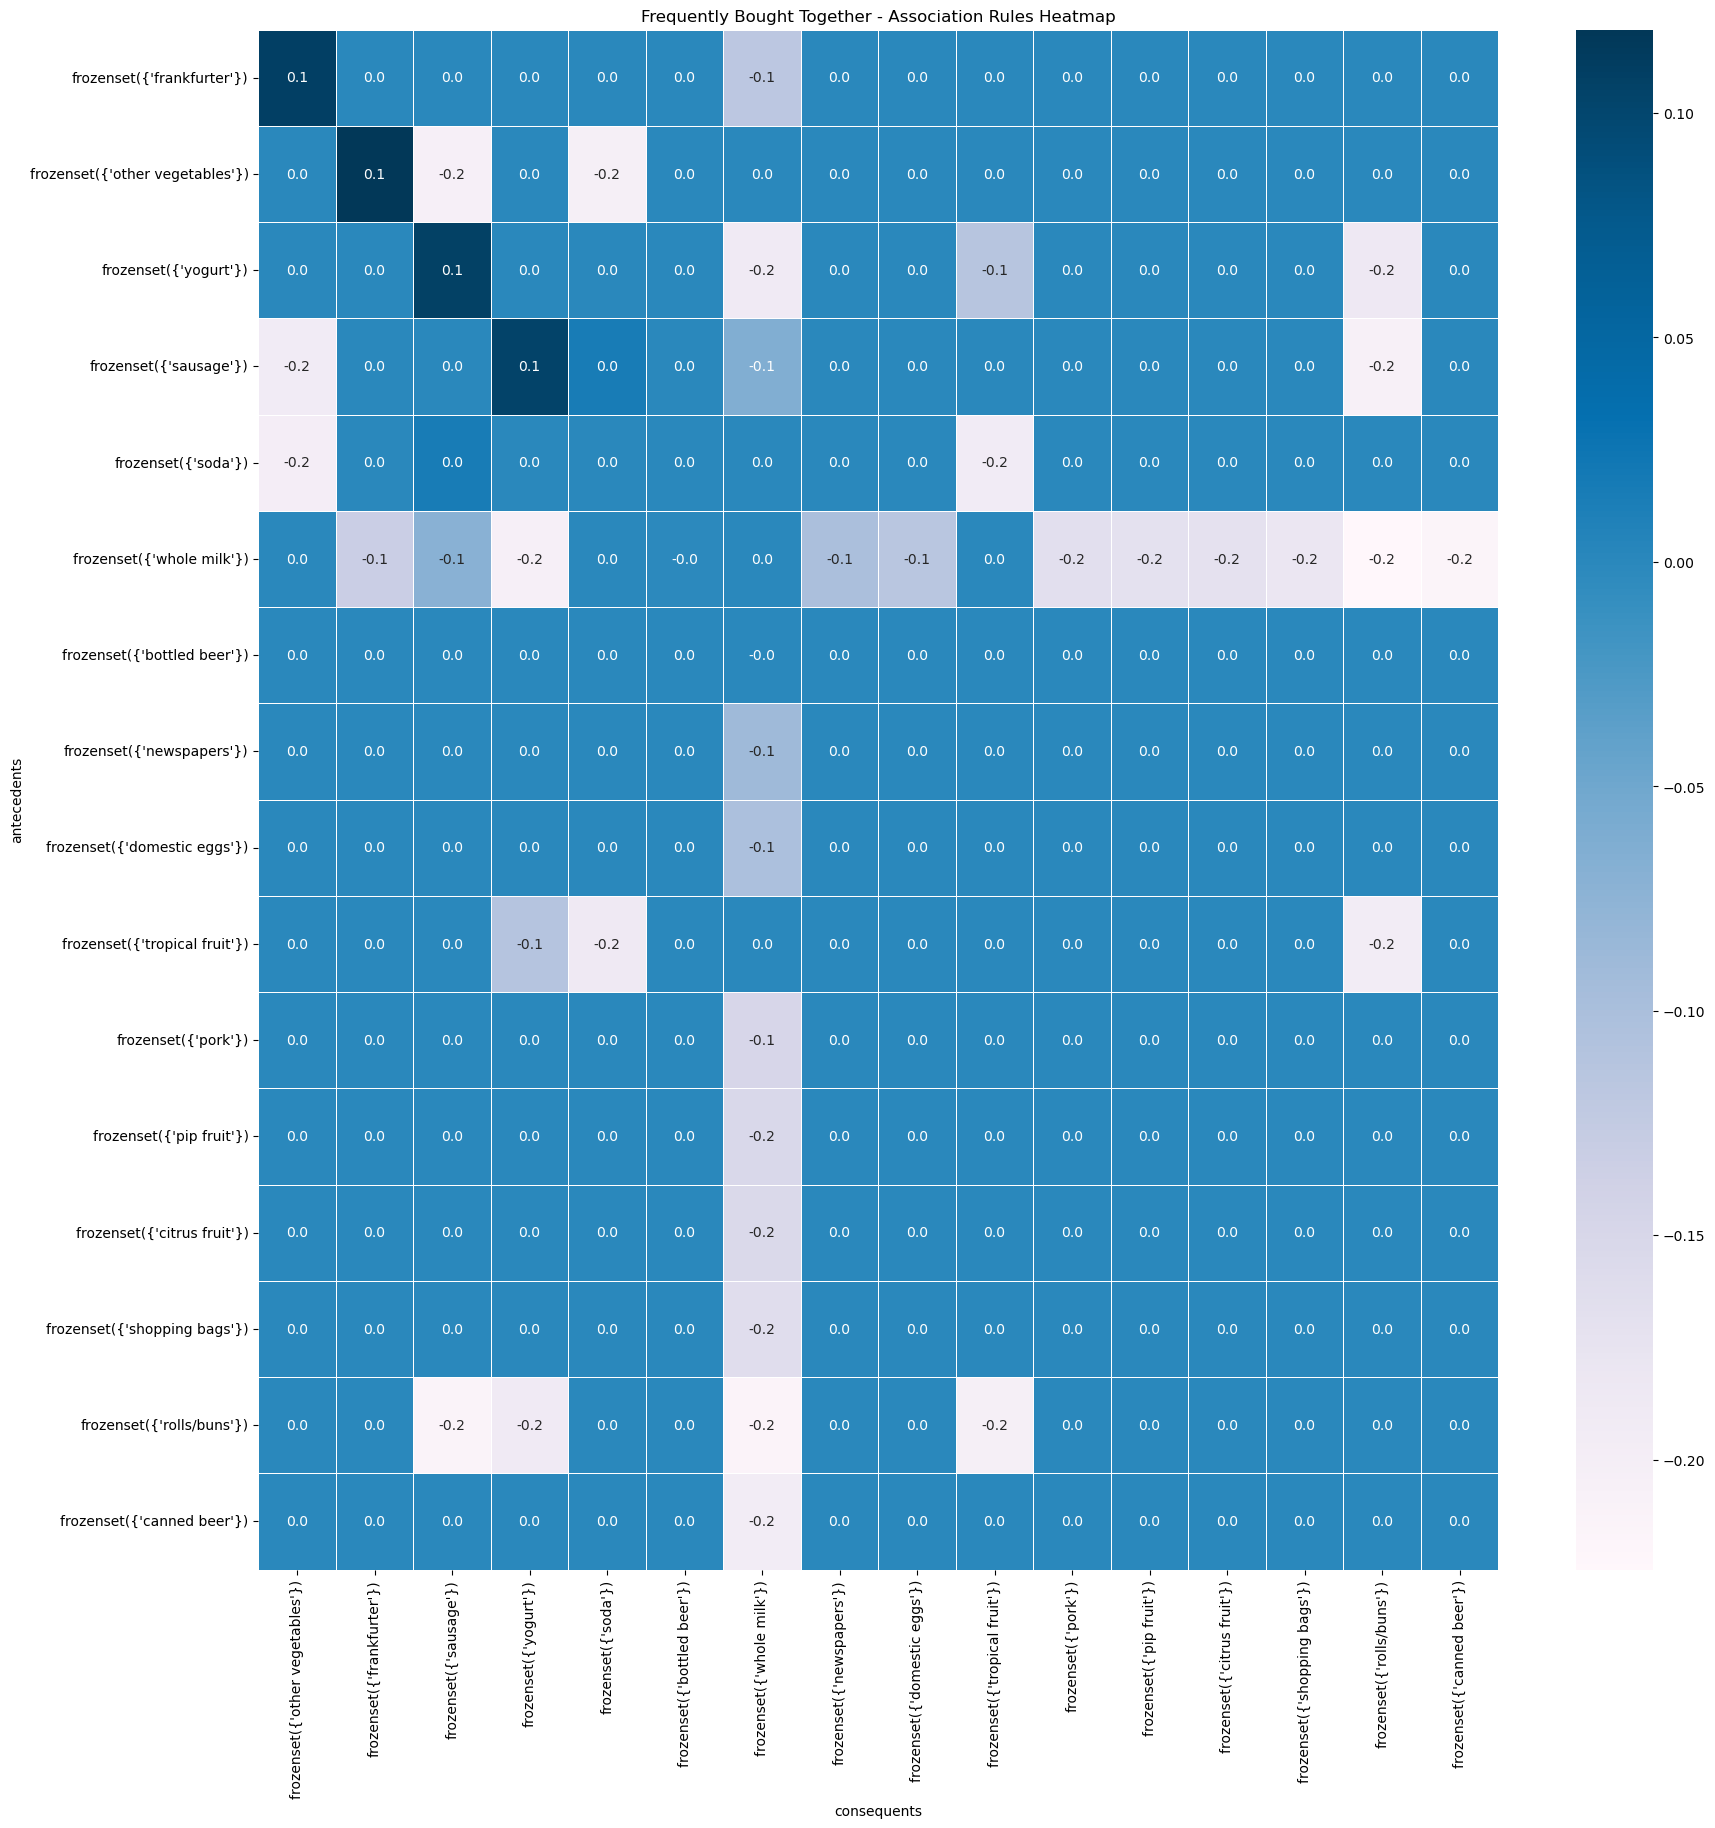

In [11]:
# Visualizing association rules heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

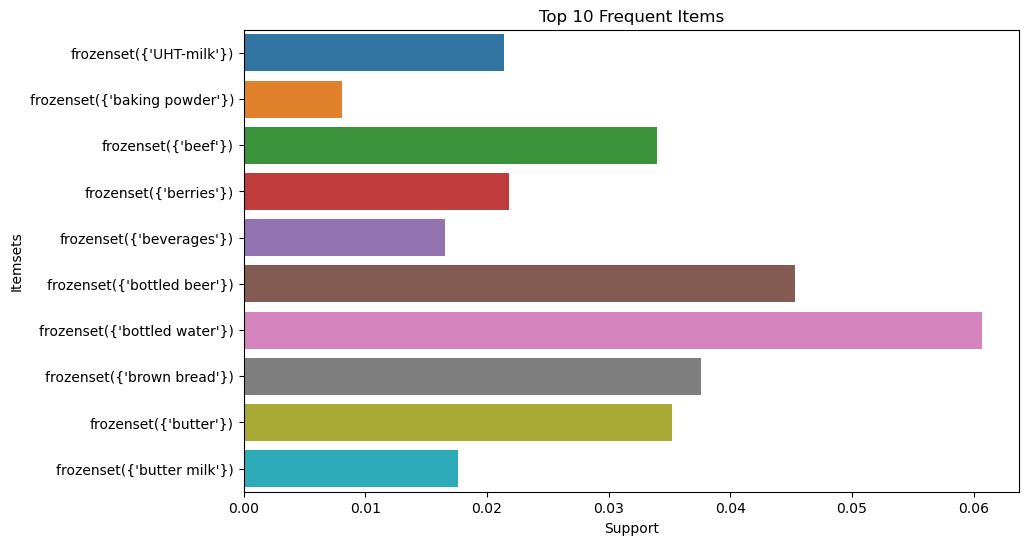

In [12]:
# Visualizing top 10 frequent itemsets
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top 10 frequent items
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.head(10))
plt.title('Top 10 Frequent Items')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


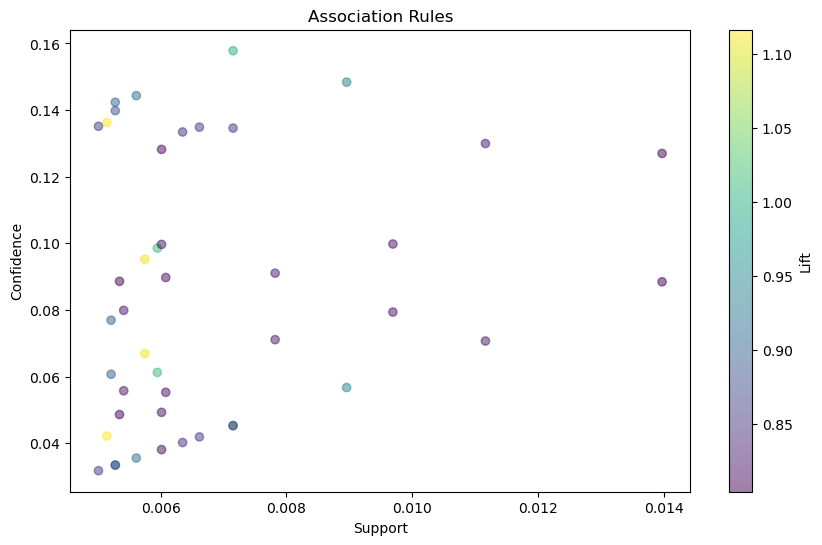

In [13]:
# Visualizing scatter plot of association rules
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.5)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()


## Step 5: Interpretation and Insights

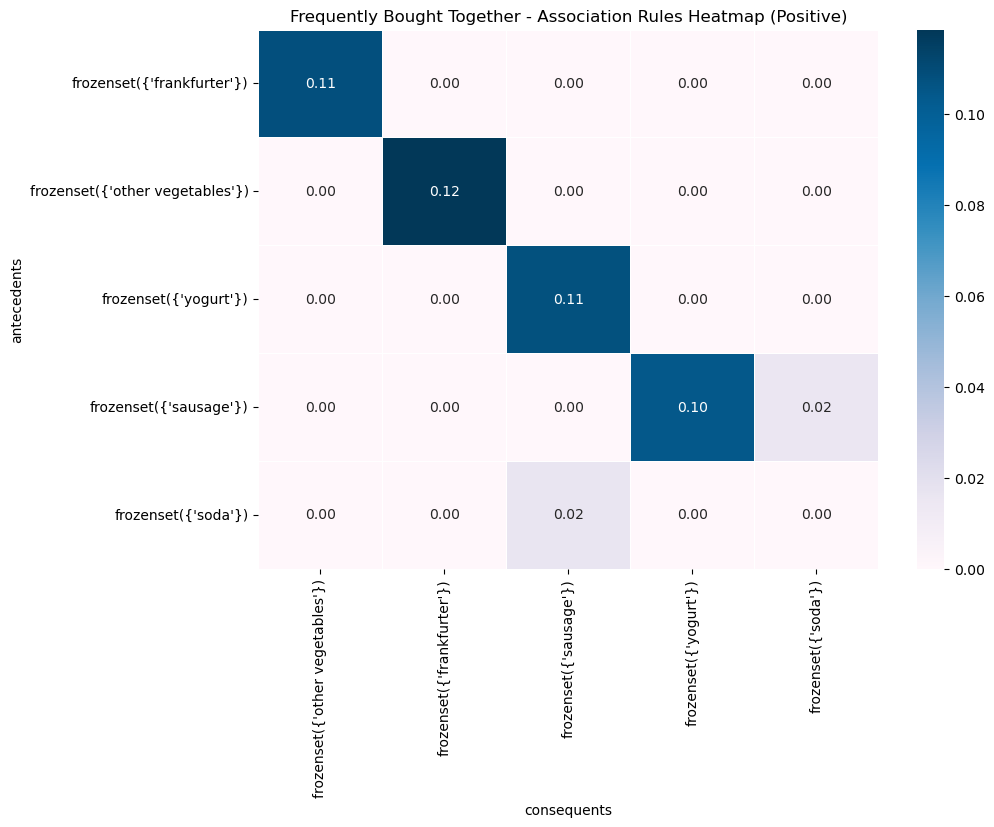

In [14]:
# Step 5: Interpretation and Insights

# I used Zhang's metric in my visualization because it combines support, confidence, and lift into a single measure.
# A negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.
# A positive value suggests the opposite.

# Taking pairs with positive Zhang's metric in a separate dataframe
pos_pair = rules[rules['zhangs_metric'] > 0]

# Creating a matrix of product associations for positive pairs
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Creating a heatmap for positive associations
plt.figure(figsize=(10, 7))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap (Positive)")
plt.show()

## Step 5: Interpretation and Insights

In [15]:
# Step 5: Interpretation and Insights

# Analyzing the association rules to uncover patterns and understand customer purchasing behavior

# Displaying the top association rules
print("Top 10 Association Rules:")
print(rules.head(10))

# You can further analyze the association rules to uncover patterns and understand customer purchasing behavior
# For example, you can identify frequently co-occurring items and suggest product bundling or promotional strategies
# Additionally, you can explore the lift, support, and confidence values to understand the strength and significance of the association rules


Top 10 Association Rules:
           antecedents         consequents  antecedent support  \
9        (frankfurter)  (other vegetables)            0.037760   
8   (other vegetables)       (frankfurter)            0.122101   
35            (yogurt)           (sausage)            0.085879   
34           (sausage)            (yogurt)            0.060349   
30           (sausage)              (soda)            0.060349   
31              (soda)           (sausage)            0.097106   
0         (whole milk)      (bottled beer)            0.157923   
1       (bottled beer)        (whole milk)            0.045312   
32           (sausage)        (whole milk)            0.060349   
33        (whole milk)           (sausage)            0.157923   

    consequent support   support  confidence      lift  leverage  conviction  \
9             0.122101  0.005146    0.136283  1.116150  0.000536    1.016420   
8             0.037760  0.005146    0.042146  1.116150  0.000536    1.004579   
35     

## Step 5: Interpretation and Insights (Part 2)

In [16]:
# Further analysis: Identify frequently co-occurring items
frequent_items = rules[['antecedents', 'consequents', 'support']].sort_values(by='support', ascending=False)
print("\nTop 10 Frequent Co-Occurring Items:")
print(frequent_items.head(10))


Top 10 Frequent Co-Occurring Items:
           antecedents         consequents   support
26        (whole milk)        (rolls/buns)  0.013968
27        (rolls/buns)        (whole milk)  0.013968
43            (yogurt)        (whole milk)  0.011161
42        (whole milk)            (yogurt)  0.011161
17              (soda)  (other vegetables)  0.009691
16  (other vegetables)              (soda)  0.009691
32           (sausage)        (whole milk)  0.008955
33        (whole milk)           (sausage)  0.008955
28            (yogurt)        (rolls/buns)  0.007819
29        (rolls/buns)            (yogurt)  0.007819


## Step 5: Interpretation and Insights (Part 3)

In [17]:
# Further analysis: Analyze lift, support, and confidence values
print("\nStatistics of Association Rules:")
print(rules[['support', 'confidence', 'lift']].describe())


Statistics of Association Rules:
         support  confidence       lift
count  44.000000   44.000000  44.000000
mean    0.006862    0.085516   0.887557
std     0.002230    0.039420   0.092886
min     0.005012    0.031739   0.804028
25%     0.005347    0.049096   0.817302
50%     0.006015    0.079623   0.853165
75%     0.007151    0.128644   0.913926
max     0.013968    0.157817   1.116150


## Step 5: Interpretation and Insights (Part 4)



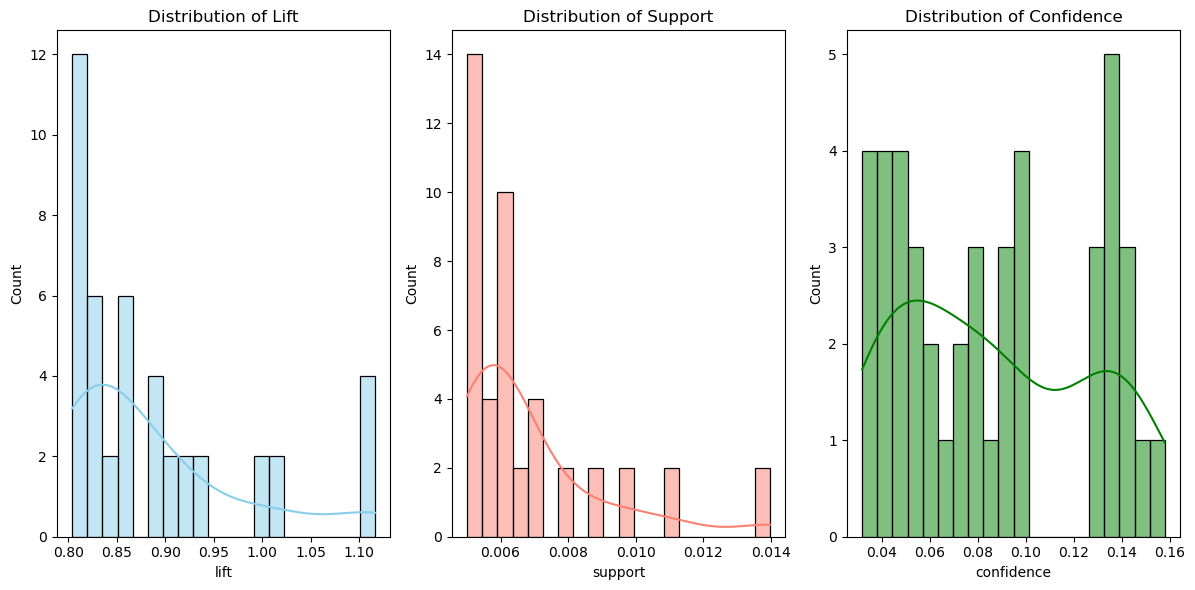

In [18]:
# Further analysis: Visualize lift, support, and confidence values
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(rules['lift'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Lift')

plt.subplot(1, 3, 2)
sns.histplot(rules['support'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Support')

plt.subplot(1, 3, 3)
sns.histplot(rules['confidence'], bins=20, kde=True, color='green')
plt.title('Distribution of Confidence')

plt.tight_layout()
plt.show()

## Step 6: Recommendations

In [19]:
# Recommendations based on the insights obtained from the analysis

# Example 1: Product Bundling
# Identify frequently co-occurring items and create bundled offers to encourage customers to purchase them together
print("Product Bundling Recommendations:")
print("Consider offering bundled deals for frequently co-occurring items to incentivize customers to purchase them together.")

# Example 2: Promotional Strategies
# Use association rules to design targeted promotions or discounts on items frequently purchased together
print("\nPromotional Strategy Recommendations:")
print("Leverage association rules to design targeted promotions or discounts on items frequently purchased together, increasing overall sales.")

# Example 3: Cross-Selling Opportunities
# Identify items frequently purchased together and suggest complementary products to customers during checkout or via email marketing
print("\nCross-Selling Opportunities:")
print("Identify items frequently purchased together and suggest complementary products to customers during checkout or via email marketing campaigns, increasing average order value.")

# Feel free to add more specific recommendations tailored to your business context and the insights obtained from the analysis.

Product Bundling Recommendations:
Consider offering bundled deals for frequently co-occurring items to incentivize customers to purchase them together.

Promotional Strategy Recommendations:
Leverage association rules to design targeted promotions or discounts on items frequently purchased together, increasing overall sales.

Cross-Selling Opportunities:
Identify items frequently purchased together and suggest complementary products to customers during checkout or via email marketing campaigns, increasing average order value.
